<a href="https://colab.research.google.com/github/Alhagie1/Alhagie1/blob/main/EmailSpamClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
File exists.
     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      

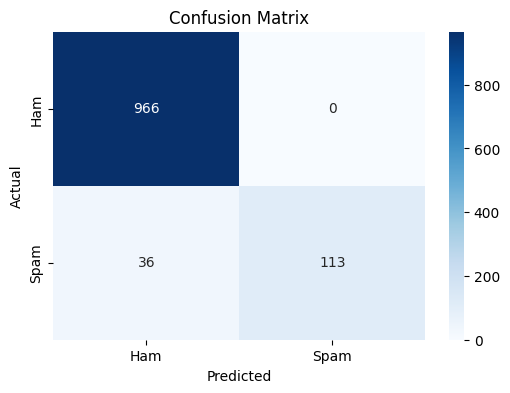

Label counts for chart: {'ham': 4825, 'spam': 747}


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import os
import seaborn as sns
import matplotlib.pyplot as plt
# Loading the file from my drive
from google.colab import drive
drive.mount('/content/drive')
# Check if file exists
file_path = "/content/drive/MyDrive/mail_data.csv"
if os.path.exists(file_path):
    print("File exists.")

    # Load the dataset
    data = pd.read_csv(file_path)
    print(data)
    data = data.where((pd.notnull(data)), '')

    print(data.head(10))
    print(data.info())
    print(data.shape)

    # Replace missing values with empty string
    data['Message'] = data['Message'].fillna('')
    # mapping the categories as binary
    data['Category'] = data['Category'].map({'spam': 1, 'ham': 0})

    # Split features and labels
    X = data['Message']
    y = data['Category']
    # print the messages
    print(X)
    # print the categories
    print(y)

    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Convert text to TF-IDF features
    vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Train logistic regression model
    model = LogisticRegression()
    model.fit(X_train_tfidf, y_train)

    # Predict on test set
    y_pred = model.predict(X_test_tfidf)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Process and count labels for chart
    label_counts = data['Category'].value_counts()
    label_counts = label_counts.rename(index={0: 'ham', 1: 'spam'})
    print(f"Label counts for chart: {label_counts.to_dict()}")

else:
    print("File does not exist. Please upload the file using the following code:")
    print("from google.colab import files")
    print("uploaded = files.upload()")